# ***NAIVE BAYES CLASSIFIER***

## 1. **LOAD AND EXPLORATION:**

### **Dataset: Stellar Classification dataset**

**The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.**

1) **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2) **alpha** = Right Ascension angle (at J2000 epoch)
3) **delta** = Declination angle (at J2000 epoch)
4) **u** = Ultraviolet filter in the photometric system
5) **g** = Green filter in the photometric system
6) **r** = Red filter in the photometric system
7) **i** = Near Infrared filter in the photometric system
8) **z** = Infrared filter in the photometric system
9) **run_ID** = Run Number used to identify the specific scan
10) **rereun_ID** = Rerun Number to specify how the image was processed
11) **cam_col** = Camera column to identify the scanline within the run
12) **field_ID** = Field number to identify each field
13) **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations         with he same spec_obj_ID must share the output class)
14) **class** = object class (galaxy, star or quasar object)
15) **redshift** = redshift value based on the increase in wavelength
16) **plate** = plate ID, identifies each plate in SDSS
17) **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18) **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation




In [43]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,recall_score, precision_score, classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [44]:
#loading the data

df=pd.read_csv('./star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [45]:
#getting the statiscal information

df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


## 2. **DATA CLEANING**

#### **Checking for missing values:**



In [46]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### *There are no missing values in the dataset*

#### Checking for duplicate entries:

In [47]:
df.duplicated().sum()

0

In [48]:
#statisical information of categorical column (i.e object)


df.describe(include=['O'])

,class
count,100000
unique,3
top,GALAXY
freq,59445


In [49]:
#counting the frequency of each element from the 'class'


df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

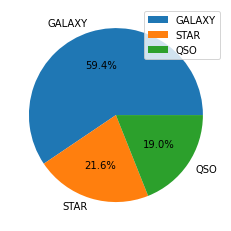

In [50]:
#proportion of different elements of the class


plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

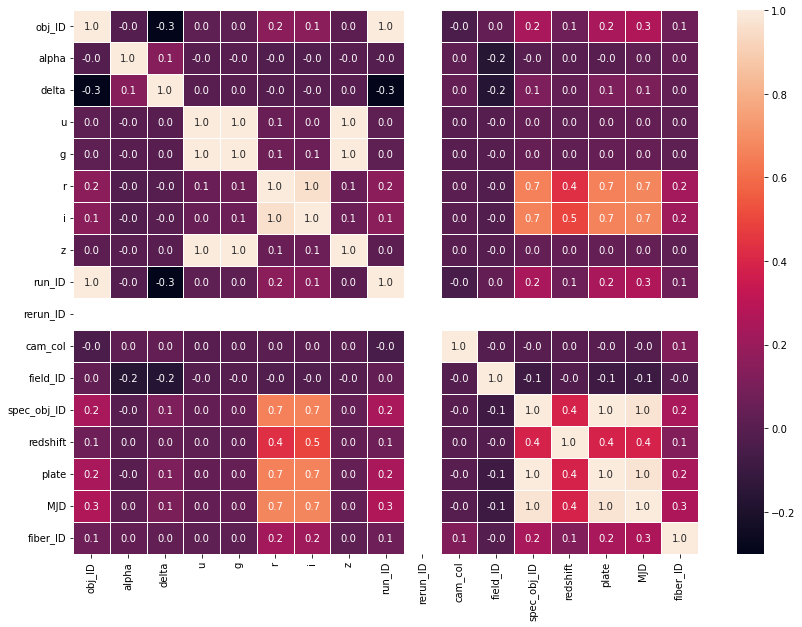

In [51]:
#correlation between the columns


plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [52]:
print([col for col in df])

['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']


### Analyzing the features against the "obj_ID" (primary key) for correlation:

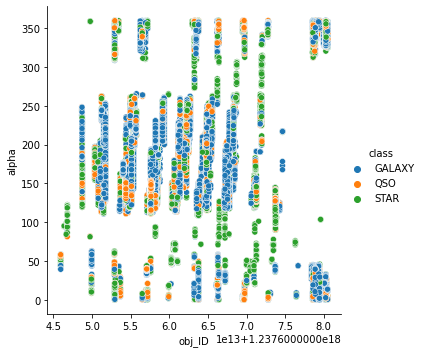

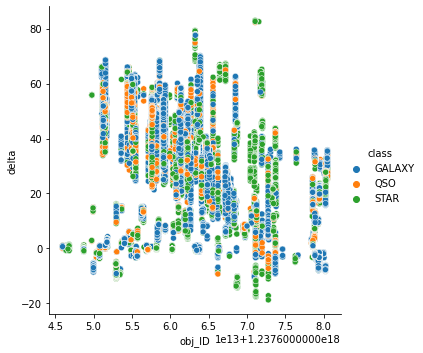

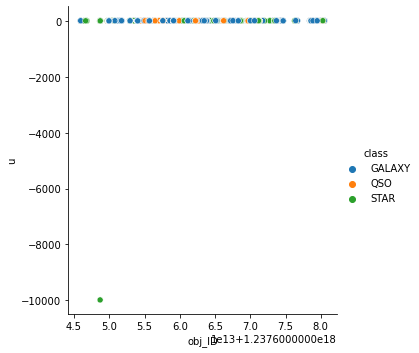

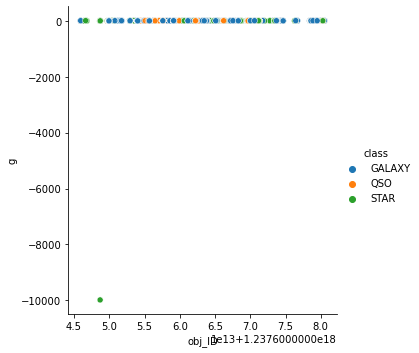

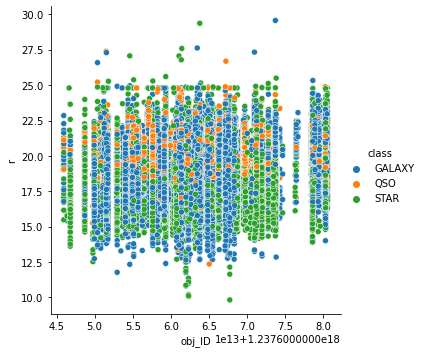

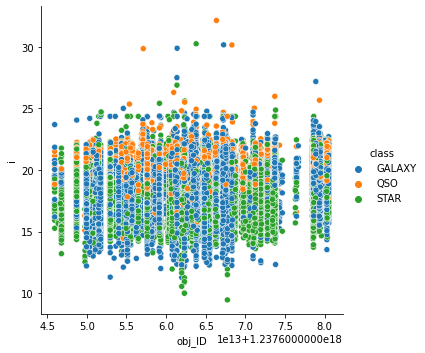

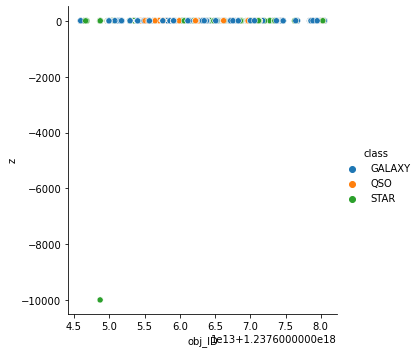

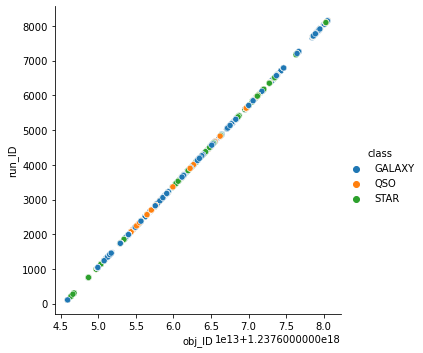

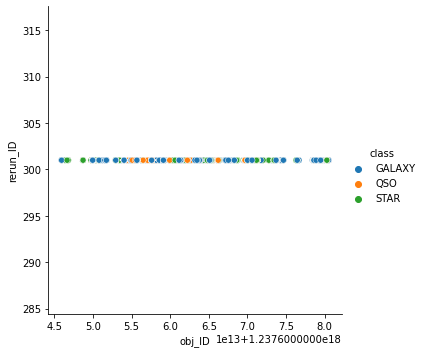

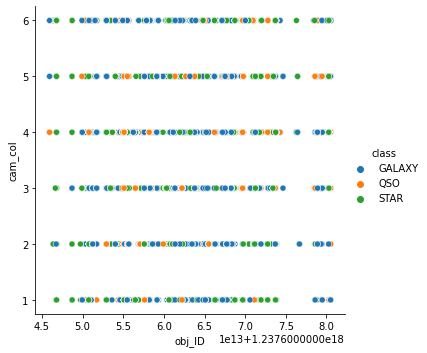

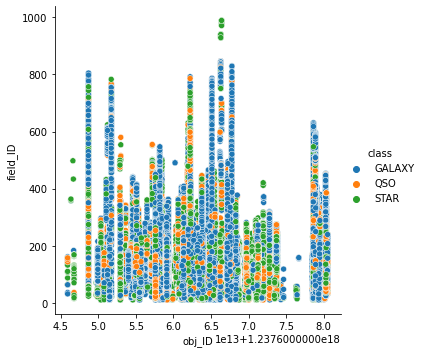

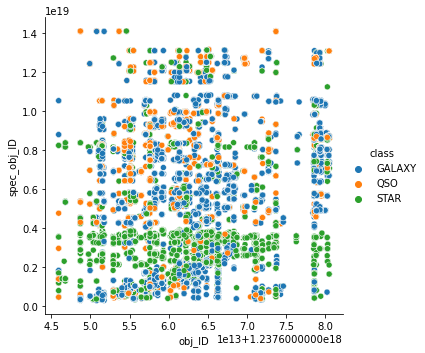

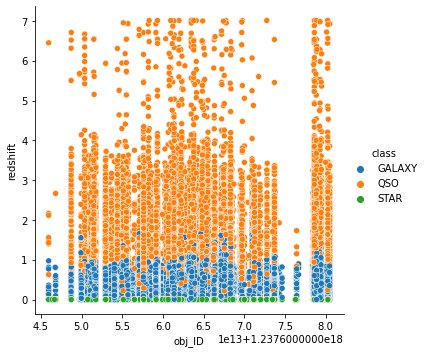

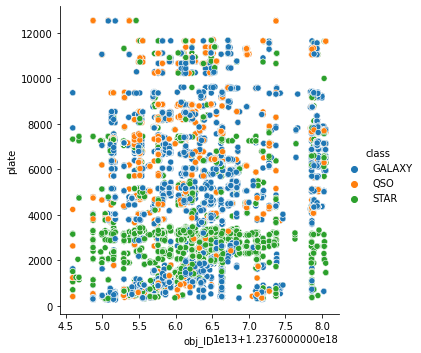

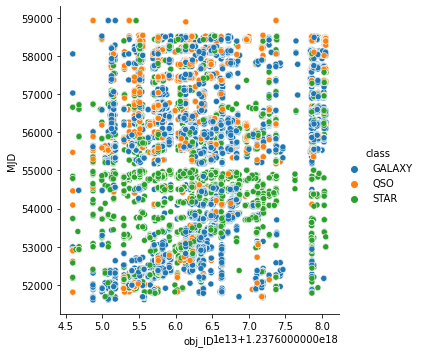

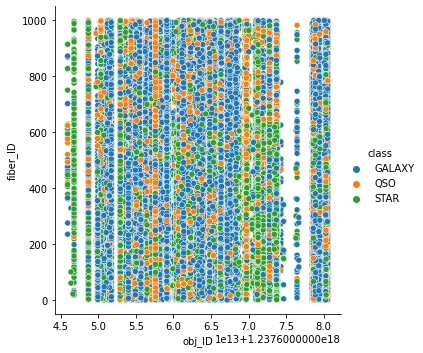

In [12]:
#comparing variations of different attributes with 'obj_ID'


plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x ='obj_ID', y=i, hue='class')
    plots.append(g);

####  The distribution of 'u' , 'g' , 'z' , 'run_ID' , 'rerun_ID' , 'cam_col' are either linear or horizontal straight line to obj_ID. Attributes which are showing y=mx+c relationship with obj_ID are insiginificant and need to removed. 

#### **It is clear that 'u' , 'g' , 'z' , 'run_ID' , 'rerun_ID' , 'cam_col' are insiginificant and need to removed.**

#### Here it seems that the redshift plays an important part in the stellar classification since we can clearly distinguish between the various clusters of points.


In [53]:
#dropping the unnecessary columns


df.drop(['obj_ID','cam_col', 'run_ID', 'rerun_ID'] ,axis=1, inplace=True)
df.shape

(100000, 14)

In [54]:
#Filtering the data
#Removing the outliers

print('Shape before filtering :',df.shape)
df=df[df.z>-2000]
df=df[df.u>-2000]
df=df[df.g>-2000]
print('Shape after filtering :',df.shape)

Shape before filtering : (100000, 14)
Shape after filtering : (99999, 14)




### **Now Showing the distribution of each feature:**

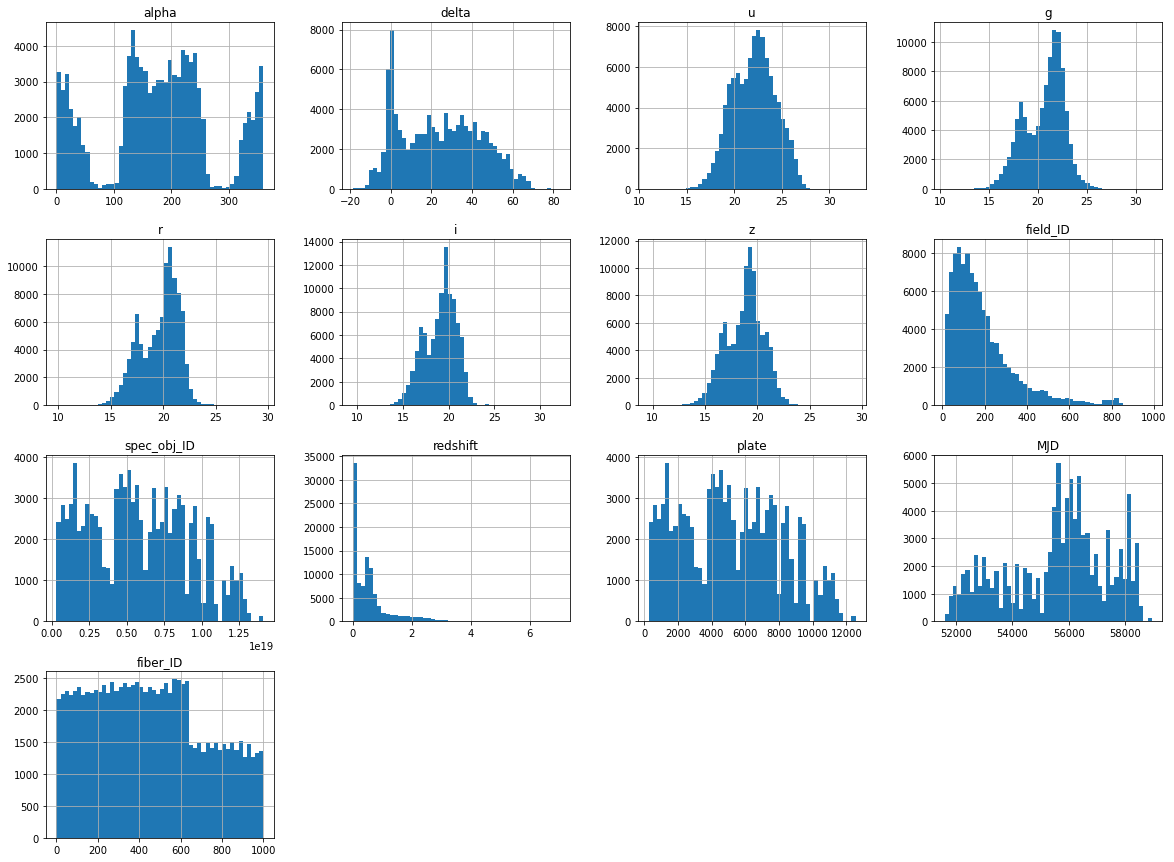

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show() 

### **Most of the features follow normal distrubution...Hence we can proceed with Gaussian Naive Bayes**

In [55]:
#x,y prepare 
y=df['class']
x = df.drop( ['class'],axis=1)

In [56]:
x.shape, y.shape

((99999, 13), (99999,))

In [57]:
y.head()

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
Name: class, dtype: object



### **Deal with categorical data**

In [58]:
encoder = LabelEncoder()

In [59]:
y = encoder.fit_transform(y)

In [60]:
y = pd.DataFrame(y)

In [61]:
y.value_counts()

0    59445
2    21593
1    18961
dtype: int64

### Converting Y to numpy array

In [62]:
y = y.to_numpy()
y.shape

(99999, 1)

In [63]:
#splitting the processed dataset into train and test dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [64]:
#Normalizing the data for better performance

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


<br>
<br>

# ALGORITHM FOR GAUSSIAN NAIVE BAYES IMPLEMENTED FROM SCRATCH 

In [69]:
class MyGaussianNaiveBayes:
    
    #Constructor for class
    def __init__(self):        
        self.n_samples = 0
        self.n_features = 0
        self.features_mean = None
        self.features_sdev = None
        self.unique_labels = None
        self.prior_probabilities = None
        
        
    #fit function for training the model
    def fit(self, X, y):
        self.n_samples, n_features = X.shape
        self.unique_labels = np.unique(y)
        
        n_unique_labels = len(self.unique_labels) 
        
        self.features_mean = np.zeros(( n_unique_labels, n_features ), dtype=np.float64)
        self.features_sdev = np.zeros(( n_unique_labels, n_features ), dtype=np.float64)
        self.prior_probabilities = np.zeros( n_unique_labels, dtype=np.float64)
        
        
        for index,label in enumerate(self.unique_labels):
            X_label = X[y == label]
            self.features_mean[index, :] = X_label.mean(axis=0)
            self.features_sdev[index, :] = X_label.var(axis=0)
            self.prior_probabilities[index] = X_label.shape[0] / float(self.n_samples)
        
            
    #predict function
    def predict(self, X):
        y_predicted = [ self.predictEach(x) for x in X ]
        return y_predicted
    
    #helper function for predict method 
    def predictEach(self, x):
        posteriors = []
        
        for index, label in enumerate(self.unique_labels):
            prior = self.prior_probabilities[index]
            class_conditional = np.prod(self.calculate_probabilities(index, x))
            posterior = prior*class_conditional
            posteriors.append(posterior)
        
        return self.unique_labels[np.argmax(posteriors)]
            
    
    #helper method to calculate conditional probabilities
    def calculate_probabilities(self, classIndex, x):
        mean = self.features_mean[classIndex]
        variance = self.features_sdev[classIndex]
        numerator = np.exp( - (x-mean)**2 / (2*variance) )
        denominator = np.sqrt( 2* np.pi * variance)
        return numerator / denominator
        

In [70]:
y_train

array([0, 0, 0, ..., 2, 0, 0])

In [71]:
#reshaping column vector to 1_D array

y_train = y_train.reshape(-1)

In [72]:
x_train.shape, y_train.shape

((79999, 13), (79999,))

### 3. TRAIN THE MODEL

### A) GAUSSIAN NAIVE-BAYES IMPLEMENTED FROM SCRATCH

In [73]:
myModel = MyGaussianNaiveBayes()

In [74]:
#fit the data
myModel.fit(x_train, y_train)

### Predicting and Performance metrics of the model

Performace metrics for AGORITHM IMPLEMENTED FROM SCRATCH!!!

Accuracy =  88.38 %
Global Precision =  0.88385
Global Recall =  0.88385 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10674
           1       0.88      0.66      0.75      5081
           2       0.97      0.98      0.97      4245

    accuracy                           0.88     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.89      0.88      0.88     20000


confusion matrix: 
 [[10178  1639    87]
 [  469  3341     0]
 [   27   101  4158]]
---------------------------------------


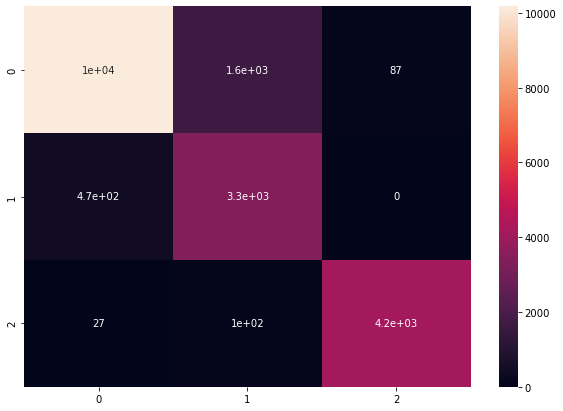

In [77]:
#predict for test samples
y_predicted_myModel = myModel.predict(x_test)


print("Performace metrics for AGORITHM IMPLEMENTED FROM SCRATCH!!!\n")
print("Accuracy = ", round(accuracy_score(y_test, y_predicted_myModel)*100, 2), "%")
print("Global Precision = ",precision_score(y_test, y_predicted_myModel, average='micro'))
print("Global Recall = ",recall_score(y_test, y_predicted_myModel, average='micro'),"\n")

print(classification_report(y_predicted_myModel,y_test))

cm=confusion_matrix(y_test,y_predicted_myModel)
print("\nconfusion matrix: \n",cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
print("---------------------------------------")

## B) GAUSSIAN NAIVE-BAYES from SKLEARN library ( Inbuilt modules )

## 3. TRAIN THE MODEL

In [78]:
gaussianModel = GaussianNB()

In [79]:
gaussianModel.fit(x_train, y_train)

GaussianNB()

### Prediction and Performance analysis

Performance metrics for Naive-bayes from scikit-learn module!

Accuracy =  88.38 %
Global Precision =  0.88385
Global Recall =  0.88385 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10674
           1       0.88      0.66      0.75      5081
           2       0.97      0.98      0.97      4245

    accuracy                           0.88     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.89      0.88      0.88     20000


confusion matrix: 
 [[10178  1639    87]
 [  469  3341     0]
 [   27   101  4158]]
---------------------------------------


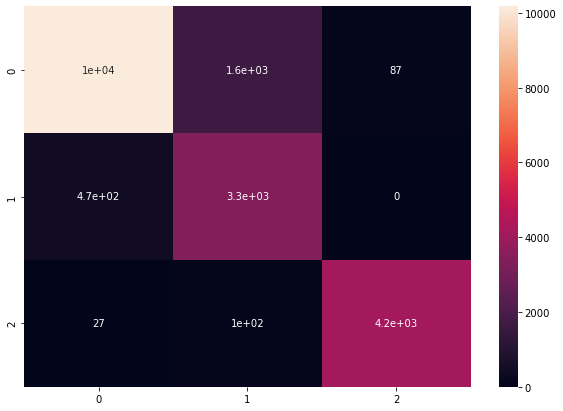

In [81]:
#predict

y_predicted = gaussianModel.predict(x_test)

print("Performance metrics for Naive-bayes from scikit-learn module!\n")
print("Accuracy = ", round(accuracy_score(y_test, y_predicted)*100, 2), "%")
print("Global Precision = ",precision_score(y_test, y_predicted, average='micro'))
print("Global Recall = ",recall_score(y_test, y_predicted, average='micro'),"\n")

print(classification_report(y_predicted,y_test))

cm=confusion_matrix(y_test,y_predicted)
print("\nconfusion matrix: \n",cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
print("---------------------------------------")

## 4. EVALUATE THE PERFORMANCE OF THE ALGORITHMS:

## COMPARISON OF PERFORMANCE OF BOTH IMPLEMENTATION:

### NAIVE-BAYES (Gaussian) from scratch:

1. Accuracy =  88.38 %
2. Global Precision =  0.88385
3. Global Recall =  0.88385 


### NAIVE-BAYES (Gaussian) using SKlearn module:

1. Accuracy =  88.38 %
2. Global Precision =  0.88385
3. Global Recall =  0.88385 